# **FEATURE ENGINEERING**

## Objectives

* Deal with outliers, distributions, categorical encoding and numerical scale transformation to engineer dataset for machine learning task

## Inputs

* outputs/datasets/cleaned/cleaned_testset.csv
* outputs/datasets/cleaned/cleaned_trainset.csgv

## Outputs

* Feature engineering pipeline and dataset with featured variables


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/pp5_project_heritage_housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/pp5_project_heritage_housing'

---

# Rationale

Exploratory data analysis and ydataprofile report suggest the following

- Target variable (Sale price) is imbalanced, so are other variables. They have high skewness and high kurtosis
- Four categorical variables need encoding
- There are outliers. However, we don't know if they are really part of dataset or just a record error.

---

## Outliers

We should handle outlier first before appliyng transformation. The reason is that transformation can be sensitive to outliers (for example Box-Cox transformation) and in general leads to more accurate statastical analysis.

But, how we do know if an outlier is a recording error or a genuine record? 

For that, we need disucssion with other team members.

Additionally, we can assume that the dataset will update in future and it will also have outliers. So, it is best to find a way to deal with it in a pipeline rather than manually picking and removing rows.

So, for now we will consider that they are part of the database. For that reason we will choose Winsoriser instead of trimming

---

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
# read data
df_source_data=pd.read_csv("outputs/datasets/collection/house_price_records.csv")
df=df_source_data.copy()

In [6]:
df.dtypes

1stFlrSF           int64
2ndFlrSF         float64
BedroomAbvGr     float64
BsmtExposure      object
BsmtFinSF1         int64
BsmtFinType1      object
BsmtUnfSF          int64
EnclosedPorch    float64
GarageArea         int64
GarageFinish      object
GarageYrBlt      float64
GrLivArea          int64
KitchenQual       object
LotArea            int64
LotFrontage      float64
MasVnrArea       float64
OpenPorchSF        int64
OverallCond        int64
OverallQual        int64
TotalBsmtSF        int64
WoodDeckSF       float64
YearBuilt          int64
YearRemodAdd       int64
SalePrice          int64
dtype: object

Which variables to consider for this task?

Our exploratory analysis (PPS and correlation study) that some variables are more related to saleprice than the other. We will try to address them first. A combined list of them is

['1stFlrSF','GarageArea','GarageFinish','GrLivArea','KitchenQual','YearBuilt',
   'OverallQual','TotalBsmtSF',] 

Winsoriser can be applied to only numerical variables. So, we subset the following variables

In [7]:
win_var=['1stFlrSF','GarageArea','GrLivArea','YearBuilt','TotalBsmtSF',] 

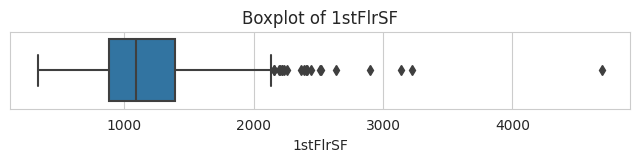

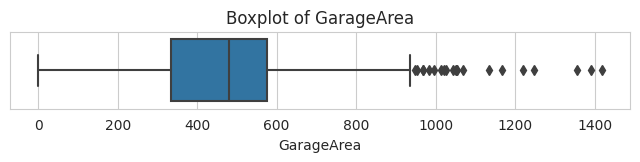

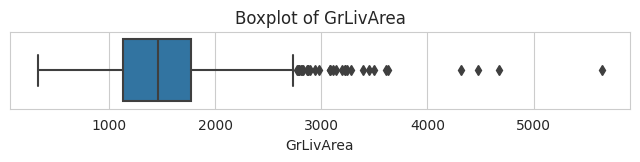

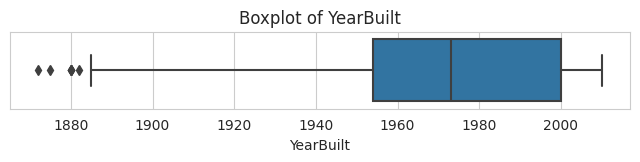

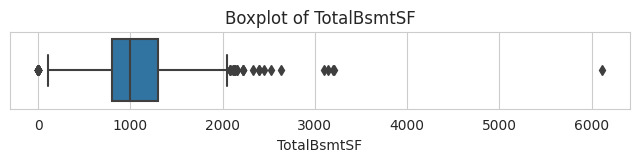

In [17]:
for var in win_var:
    plt.figure(figsize=(8,1))  # This creates a new figure on each iteration
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')  # Optionally adding a title to each plot
    plt.show()  # This displays the figure

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
